<a href="https://colab.research.google.com/github/j-o-s-h-0/Laptop-Price-Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ML model libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Laptop_Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
df.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [ ]:
# Conversion from INR to USD
df['latest_price'] *= 0.013
df['old_price'] *= 0.013
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,324.87,426.270,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,254.67,277.225,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,259.87,363.870,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,279.37,363.870,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,324.87,435.370,25,3.7,1657,234


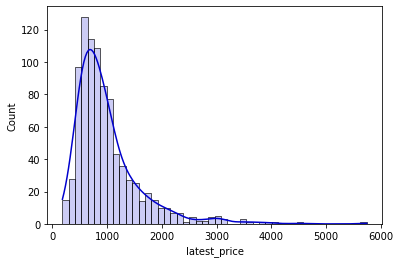

In [140]:
# Distribution of output variable
sns.histplot(df['latest_price'], kde=True, color='mediumblue', alpha=0.2)

In [ ]:
df['display_size'].value_counts()

Missing    332
15.6       218
16         135
14         131
13.3        40
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

In [ ]:
# Change 'Missing' values to NaN
df = df.replace(to_replace="Missing", value=np.nan)
df['display_size'].value_counts()

15.6     218
16       135
14       131
13.3      40
17.3       9
14.96      7
14.1       6
13         4
15         3
14.2       3
16.2       3
12.2       2
14.9       1
16.1       1
13.4       1
Name: display_size, dtype: int64

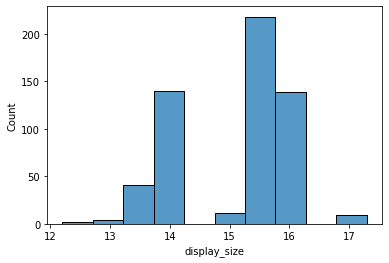

In [ ]:
# Fill categorical variable null values with mode
df["model"] = df["model"].fillna(value=(df["model"].mode()[0]))
df["processor_gnrtn"] = df["processor_gnrtn"].fillna(value=(df["processor_gnrtn"].mode()[0]))

# Check display size distribution
df["display_size"] = df["display_size"].astype(float).round(2)
sns.histplot(x=df["display_size"],bins=10)
# Fill display size null values with mean
df["display_size"] = df["display_size"].fillna(value=(df["display_size"].mean()))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    float64
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
# Change GB columns to discrete values
df['ssd'] = df['ssd'].replace(' GB', '', regex=True)
df['hdd'] = df['hdd'].replace(' GB', '', regex=True)
df['ram_gb'] = df['ram_gb'].replace(' GB GB', '', regex=True)

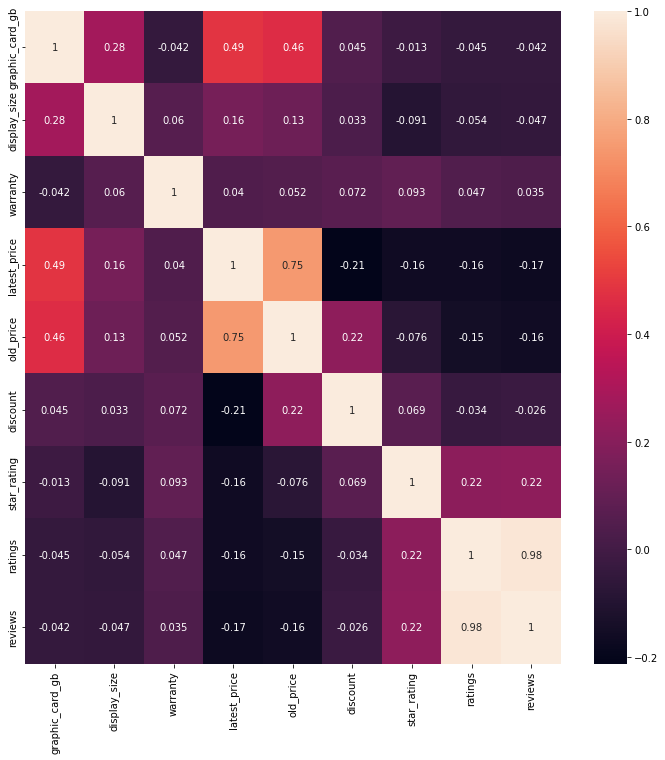

In [ ]:
# Heatmap to identify relationships among independent variables
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Get dummies for categorical values
df = pd.get_dummies(df, columns = ['brand', 'processor_brand','ram_type','os','Touchscreen', 'msoffice','os_bit', 'weight', 'processor_gnrtn'])

In [ ]:
# Create independent and dependednt variables
X = df.drop(columns = ['model', 'processor_name', 'latest_price', 'old_price', 'discount'])
y = df['latest_price']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Linear Regression

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

-62.32983159382684

In [ ]:
lr.coef_

array([ 2.18233007e+01,  9.45082941e-01,  2.37959134e-01,  8.24986606e+01,
        8.23175470e+01,  7.78085630e+00, -4.15177499e+01, -9.52753457e-02,
        5.71601844e-01,  1.03745905e+03,  2.77216817e+02, -9.33504753e+01,
       -1.41743022e+02, -9.79241123e+01, -6.30286487e+01, -5.18354138e+02,
        2.64164112e+02, -3.53708353e+01,  2.80555527e+02, -8.06580372e+01,
       -2.06214009e+02, -1.58099894e+02, -2.46693419e+02,  4.16495548e+01,
       -3.91755582e+01, -1.79075643e+02, -1.35725536e+02, -1.74332388e+02,
        1.15163109e+02,  1.53537546e+02,  1.80089274e+02,  1.89144104e+02,
        2.13151956e+02, -6.24034889e+02,  4.16495548e+01, -1.07663038e+02,
       -1.41810080e+02, -2.67332025e+01,  4.43047205e+02, -1.10162422e+02,
       -5.66784619e+01,  2.53326975e+02,  2.77216817e+02, -5.30543792e+02,
       -1.68821718e+02,  1.68821718e+02,  8.26193496e+00, -8.26193496e+00,
        2.55899974e+01, -2.55899974e+01,  4.36131152e+01, -1.52925289e+02,
        1.09312174e+02, -

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, lr_pred)

111778.84604916742

In [ ]:
metrics.r2_score(y_test, lr_pred)

0.6862766075574511

Text(0, 0.5, 'lr_pred')

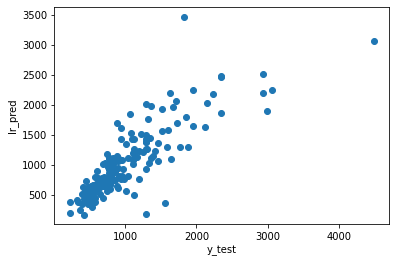

In [ ]:
plt.scatter(y_test, lr_pred)
plt.xlabel('y_test')
plt.ylabel('lr_pred')

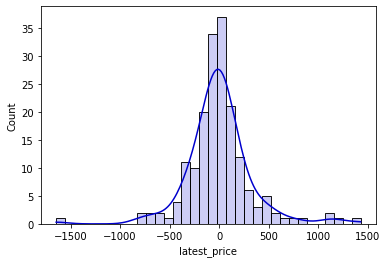

In [141]:
# Residual Error
sns.histplot((y_test - lr_pred), kde=True, color='mediumblue', alpha=0.2)

## Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
rfr_pred = rfr.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, rfr_pred)

70129.97459027219

In [ ]:
metrics.r2_score(y_test, rfr_pred)

0.803170149648062

Text(0, 0.5, 'rfr_pred')

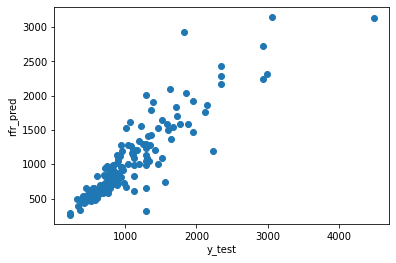

In [ ]:
plt.scatter(y_test, rfr_pred)
plt.xlabel('y_test')
plt.ylabel('rfr_pred')

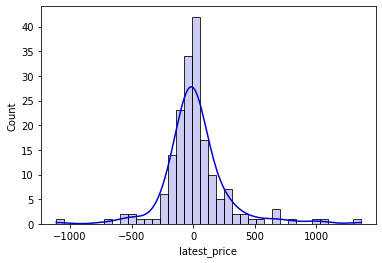

In [142]:
# Residual Error
sns.histplot((y_test - rfr_pred), kde=True, color='mediumblue', alpha=0.2)